In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.datasets import fetch_openml
from scipy import stats
from scipy.stats import norm, skew

%load_ext lab_black
%matplotlib inline

# Load the data into a Pandas DataFrame
df = pd.read_csv("house-prices.csv")
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [2]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

object     43
int64      28
float64    11
dtype: int64

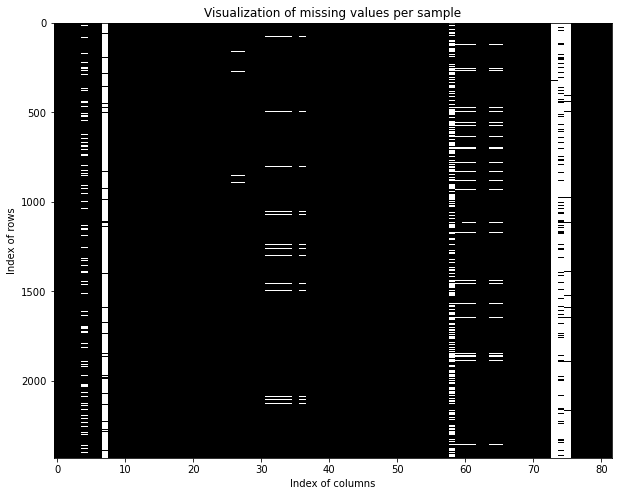

In [3]:
# This is a representation of the occupation of cells in the dataset.
plt.figure(figsize=(10, 8))
plt.title("Visualization of missing values per sample")
plt.xlabel("Index of columns")
plt.ylabel("Index of rows")
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

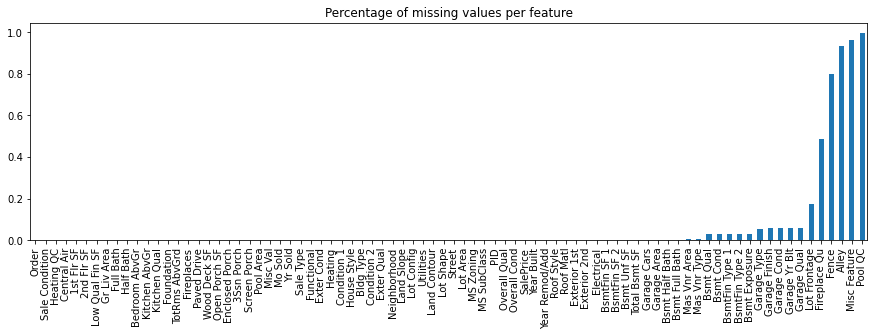

In [4]:
# If we check the % of missing information per feature
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature"
)

In [5]:
# First we check the columns which dtype is numeric
unique_numeric = df.select_dtypes(include="number").nunique().sort_values()
np.sum(np.array(unique_numeric) == 1)

0

In [6]:
# Now we check the columns wich dtype is object
unique_obj = df.select_dtypes(include="object").nunique()
np.sum(np.array(unique_obj) == 2)
print(unique_obj == 2)

MS Zoning         False
Street             True
Alley              True
Lot Shape         False
Land Contour      False
Utilities         False
Lot Config        False
Land Slope        False
Neighborhood      False
Condition 1       False
Condition 2       False
Bldg Type         False
House Style       False
Roof Style        False
Roof Matl         False
Exterior 1st      False
Exterior 2nd      False
Mas Vnr Type      False
Exter Qual        False
Exter Cond        False
Foundation        False
Bsmt Qual         False
Bsmt Cond         False
Bsmt Exposure     False
BsmtFin Type 1    False
BsmtFin Type 2    False
Heating           False
Heating QC        False
Central Air        True
Electrical        False
Kitchen Qual      False
Functional        False
Fireplace Qu      False
Garage Type       False
Garage Finish     False
Garage Qual       False
Garage Cond       False
Paved Drive       False
Pool QC           False
Fence             False
Misc Feature      False
Sale Type       

In [7]:
# We fill the NaN values of the columns saved in unique. For filling this columns, there is an only value that may be incorporated (as it was previously stated)
df.drop(["Central Air"], axis=1, inplace=True)
df.drop(["Street"], axis=1, inplace=True)

In [8]:
# We calculate the null percentage:
null_percentage = df.isnull().sum() / df.shape[0] * 100
# Drop columns with more than a 40% of missing values
for x in range(0, len(null_percentage)):
    if null_percentage[x] >= 40:
        df.drop([null_percentage.index[x]], axis=1, inplace=True)

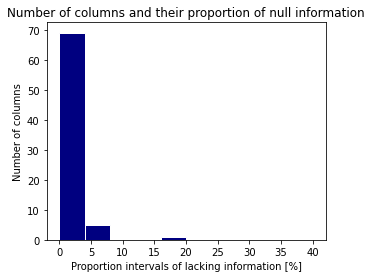

In [9]:
# % of null information in the columns
null_percentage = df.isnull().sum() / df.shape[0] * 100

hist = null_percentage.plot.hist(
    bins=10, color="navy", edgecolor="white", range=[0, 40], figsize=(5, 4)
)
hist.set_xlabel("Proportion intervals of lacking information [%]")
hist.set_ylabel("Number of columns")
hist.set_title("Number of columns and their proportion of null information")
plt.show()

In [10]:
df.drop("Order", inplace=True, axis=1)
df.drop("PID", inplace=True, axis=1)

In [11]:
null_list = df.columns[df.isnull().any()].tolist()
df[null_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2010 non-null   float64
 1   Mas Vnr Type    2410 non-null   object 
 2   Mas Vnr Area    2410 non-null   float64
 3   Bsmt Qual       2359 non-null   object 
 4   Bsmt Cond       2359 non-null   object 
 5   Bsmt Exposure   2356 non-null   object 
 6   BsmtFin Type 1  2359 non-null   object 
 7   BsmtFin SF 1    2429 non-null   float64
 8   BsmtFin Type 2  2358 non-null   object 
 9   BsmtFin SF 2    2429 non-null   float64
 10  Bsmt Unf SF     2429 non-null   float64
 11  Total Bsmt SF   2429 non-null   float64
 12  Electrical      2429 non-null   object 
 13  Bsmt Full Bath  2428 non-null   float64
 14  Bsmt Half Bath  2428 non-null   float64
 15  Garage Type     2294 non-null   object 
 16  Garage Yr Blt   2292 non-null   float64
 17  Garage Finish   2292 non-null   o

In [12]:
df[null_list].describe()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
count,2010.000000,2410.000000,2429.000000,2429.000000,2429.000000,2429.000000,2428.000000,2428.000000,2292.000000,2429.000000,2429.000000
mean,69.201990,101.995436,443.944422,51.073693,556.480856,1051.498971,0.434102,0.060132,1977.861257,1.762454,471.979415
std,23.486988,176.611699,457.453649,172.143522,439.650118,444.690012,0.527941,0.242923,25.544869,0.758243,215.753523
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1896.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,216.000000,794.000000,0.000000,0.000000,1960.000000,1.000000,324.000000
50%,68.000000,0.000000,375.000000,0.000000,462.000000,990.000000,0.000000,0.000000,1978.000000,2.000000,478.000000
75%,80.000000,164.750000,737.000000,0.000000,799.000000,1299.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,4.000000,1488.000000


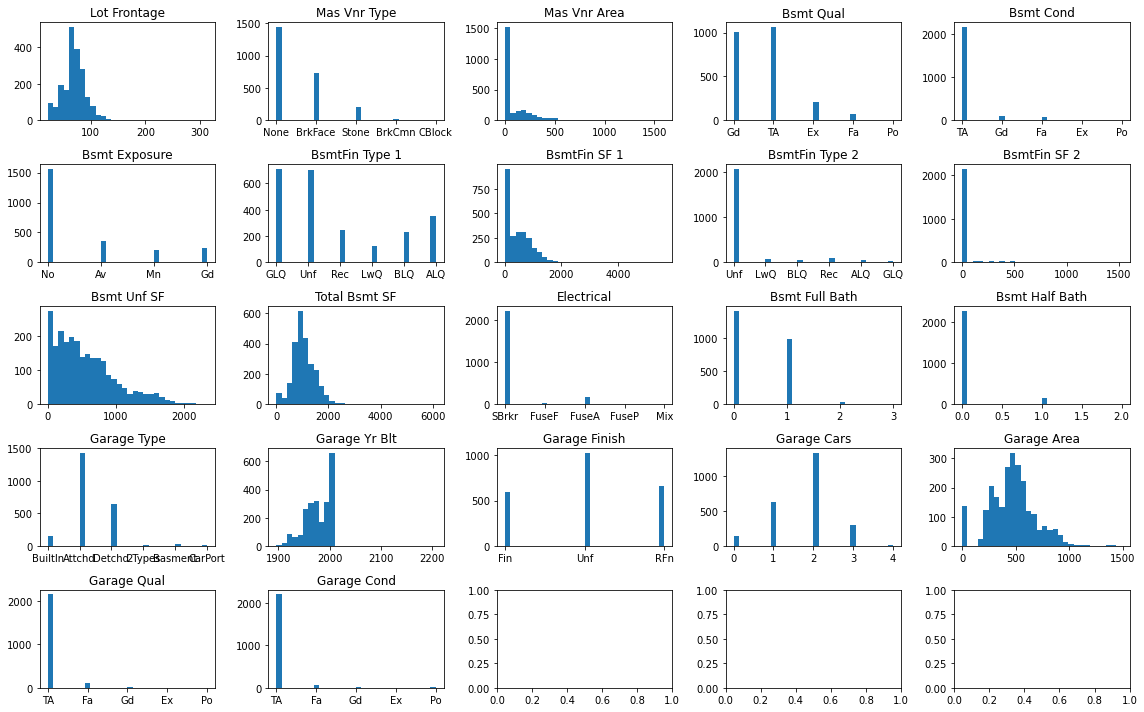

In [13]:
# A quick look at the distribution of the variables
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 10))

for c, ax in zip(null_list, axes.ravel()):
    ax.hist(df[c].dropna(), bins=30)
    ax.set_title(c)

plt.tight_layout()  # to avoid overlapping with the labels
plt.show()

In [14]:
# Replace numerical NaN values
# Mean replacements (near to normal distributions)
df["Lot Frontage"].fillna(int(df["Lot Frontage"].mean()), inplace=True)
df["Total Bsmt SF"].fillna(int(df["Total Bsmt SF"].mean()), inplace=True)
df["Garage Area"].fillna(int(df["Garage Area"].mean()), inplace=True)
# Median replacements (skewed distributions)
df["Garage Yr Blt"].fillna(int(df["Garage Yr Blt"].median()), inplace=True)
df["Mas Vnr Area"].fillna(int(df["Mas Vnr Area"].median()), inplace=True)
df["Bsmt Unf SF"].fillna(int(df["Bsmt Unf SF"].median()), inplace=True)
df["BsmtFin SF 1"].fillna(int(df["BsmtFin SF 1"].median()), inplace=True)
df["Bsmt Half Bath"].fillna(int(df["Bsmt Half Bath"].median()), inplace=True)
df["Bsmt Full Bath"].fillna(int(df["Bsmt Full Bath"].median()), inplace=True)
df["Garage Cars"].fillna(int(df["Garage Cars"].median()), inplace=True)
# Check the new list of missing values
null_list = df.columns[df.isnull().any()].tolist()
df[null_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mas Vnr Type    2410 non-null   object 
 1   Bsmt Qual       2359 non-null   object 
 2   Bsmt Cond       2359 non-null   object 
 3   Bsmt Exposure   2356 non-null   object 
 4   BsmtFin Type 1  2359 non-null   object 
 5   BsmtFin Type 2  2358 non-null   object 
 6   BsmtFin SF 2    2429 non-null   float64
 7   Electrical      2429 non-null   object 
 8   Garage Type     2294 non-null   object 
 9   Garage Finish   2292 non-null   object 
 10  Garage Qual     2292 non-null   object 
 11  Garage Cond     2292 non-null   object 
dtypes: float64(1), object(11)
memory usage: 227.9+ KB


In [15]:
# Fill categorical features with a new missing category
df["Bsmt Qual"].fillna(("Missing"), inplace=True)
df["BsmtFin Type 1"].fillna(("Missing"), inplace=True)
df["Garage Finish"].fillna(("Missing"), inplace=True)
# Check the new list of missing values
null_list = df.columns[df.isnull().any()].tolist()
df[null_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mas Vnr Type    2410 non-null   object 
 1   Bsmt Cond       2359 non-null   object 
 2   Bsmt Exposure   2356 non-null   object 
 3   BsmtFin Type 2  2358 non-null   object 
 4   BsmtFin SF 2    2429 non-null   float64
 5   Electrical      2429 non-null   object 
 6   Garage Type     2294 non-null   object 
 7   Garage Qual     2292 non-null   object 
 8   Garage Cond     2292 non-null   object 
dtypes: float64(1), object(8)
memory usage: 171.0+ KB


In [16]:
# Fill the rest of the categorical data with the most common value
df = df.fillna(df.mode().iloc[0])
# Check the new list of missing values
null_list = df.columns[df.isnull().any()].tolist()
df[null_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Empty DataFrame

In [17]:
# Number of rows
print(df.shape[0])
# Number of columns
print(df.shape[1])

2430
73


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

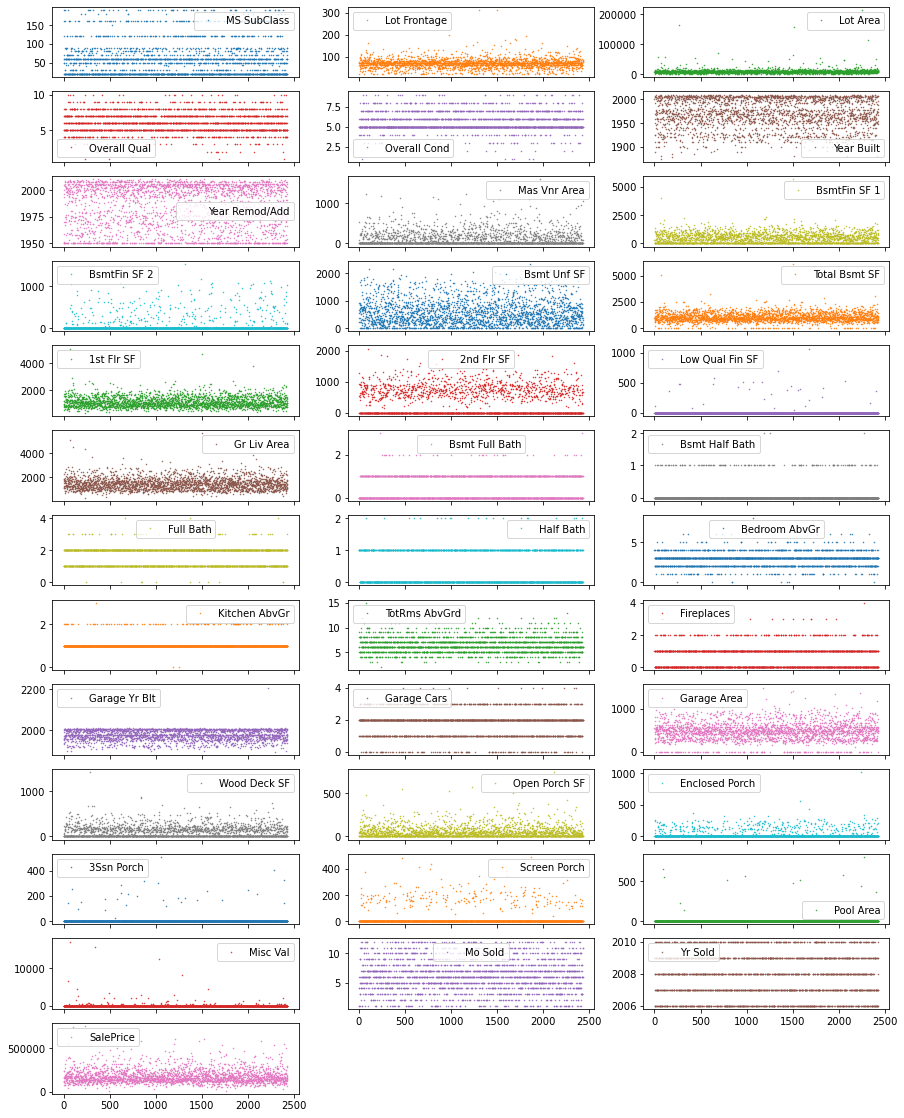

In [18]:
# Take a further look at possible outliers in the numeric category
df.select_dtypes(include=[np.number]).plot(
    lw=0, marker=".", subplots=True, layout=(-1, 3), figsize=(15, 20), markersize=1
)

In [19]:
# We will manually filter 5 variables

filter_outlier = df["Mas Vnr Area"] > 1000
df_keep = df.loc[filter_outlier, "Mas Vnr Area"]
df = df.drop(df_keep.index, axis=0)

filter_outlier = df["Lot Frontage"] > 200
df_keep = df.loc[filter_outlier, "Lot Frontage"]
df = df.drop(df_keep.index, axis=0)

filter_outlier = df["Low Qual Fin SF"] > 100
df_keep = df.loc[filter_outlier, "Low Qual Fin SF"]
df = df.drop(df_keep.index, axis=0)

filter_outlier = df["Pool Area"] > 500
df_keep = df.loc[filter_outlier, "Pool Area"]
df = df.drop(df_keep.index, axis=0)

filter_outlier = df["Garage Yr Blt"] < 1000
df_keep = df.loc[filter_outlier, "Garage Yr Blt"]
df = df.drop(df_keep.index, axis=0)

filter_outlier = df["Garage Yr Blt"] > 2022
df_keep = df.loc[filter_outlier, "Garage Yr Blt"]
df = df.drop(df_keep.index, axis=0)

filter_outlier = df["Misc Val"] > 1000
df_keep = df.loc[filter_outlier, "Misc Val"]
df = df.drop(df_keep.index, axis=0)


filter_outlier = df["BsmtFin SF 1"] > 2500
df_keep = df.loc[filter_outlier, "Misc Val"]
df = df.drop(df_keep.index, axis=0)

print(
    "After eliminating the outliers through manual filtering the new shape is "
    + str(df.shape)
)

After eliminating the outliers through manual filtering the new shape is (2359, 73)


In [21]:
nominal = []
ordinal = []
# check line by line in txt
with open("documentation.txt", "rt") as f:
    data = f.readlines()
# Generate two lists for Nominal and Ordinal variables
for line in data:
    if "(Nominal)" in line:
        nominal.append(line)

    if "(Ordinal)" in line:
        ordinal.append(line)

# Auxiliar variables for searching in the list of names
sub_str_nom = "(Nominal):"
sub_str_ord = "(Ordinal)"

# Remove after substring in String
nominal_var = []
ordinal_var = []
# slicing nominal variables names
for test_str in nominal:
    res = test_str[: test_str.index(sub_str_nom)][:-1]
    nominal_var.append(res)
# slicing ordinal variables names
for test_str in ordinal:
    res1 = test_str[: test_str.index(sub_str_ord)][:-1]
    ordinal_var.append(
        res1
    )  # We finally change MS SubClass (the numeric variable) to a non numerical version for the hot-encoding.

In [23]:
# Remove variables that have been already dropped in the original df
nominal_var.remove("PID")
nominal_var.remove("Alley")
nominal_var.remove("Misc Feature")
nominal_var.remove("Street")
nominal_var.remove("Central Air")

# Replace inexact names in .txt
nominal_var.remove("Exterior 1")
nominal_var.append("Exterior 1st")
nominal_var.remove("Exterior 2")
nominal_var.append("Exterior 2nd")

In [24]:
# Replace inexact names in .txt
ordinal_var.remove("BsmtFinType 2")
ordinal_var.append("BsmtFin Type 2")
ordinal_var.remove("HeatingQC")
ordinal_var.append("Heating QC")
ordinal_var.remove("KitchenQual")
ordinal_var.append("Kitchen Qual")
ordinal_var.remove("FireplaceQu")
# Remove variables that have been already dropped in the original df
ordinal_var.remove("Fence")
ordinal_var.remove("Pool QC")

In [25]:
pd.value_counts(df[nominal_var].dtypes)
df["MS SubClass"] = df["MS SubClass"].map(str)

object    19
dtype: int64

Text(0.5, 1.0, 'Sale Price')

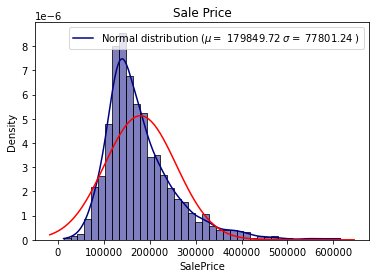

In [29]:
from scipy import stats
from scipy.stats import norm, skew

sns.set_color_codes()


ax = sns.histplot(df["SalePrice"], bins=40, stat="density", color="navy", kde=True)
mu, std = stats.norm.fit(df["SalePrice"])
normal_dist = np.linspace(*ax.get_xlim(), 100)
ax.plot(normal_dist, stats.norm.pdf(normal_dist, mu, std), color="red")
ax.legend(
    ["Normal distribution ($\mu=$ {:.2f} $\sigma=$ {:.2f} )".format(mu, std)],
    loc="best",
)
ax.set_title("Sale Price")

<AxesSubplot:>

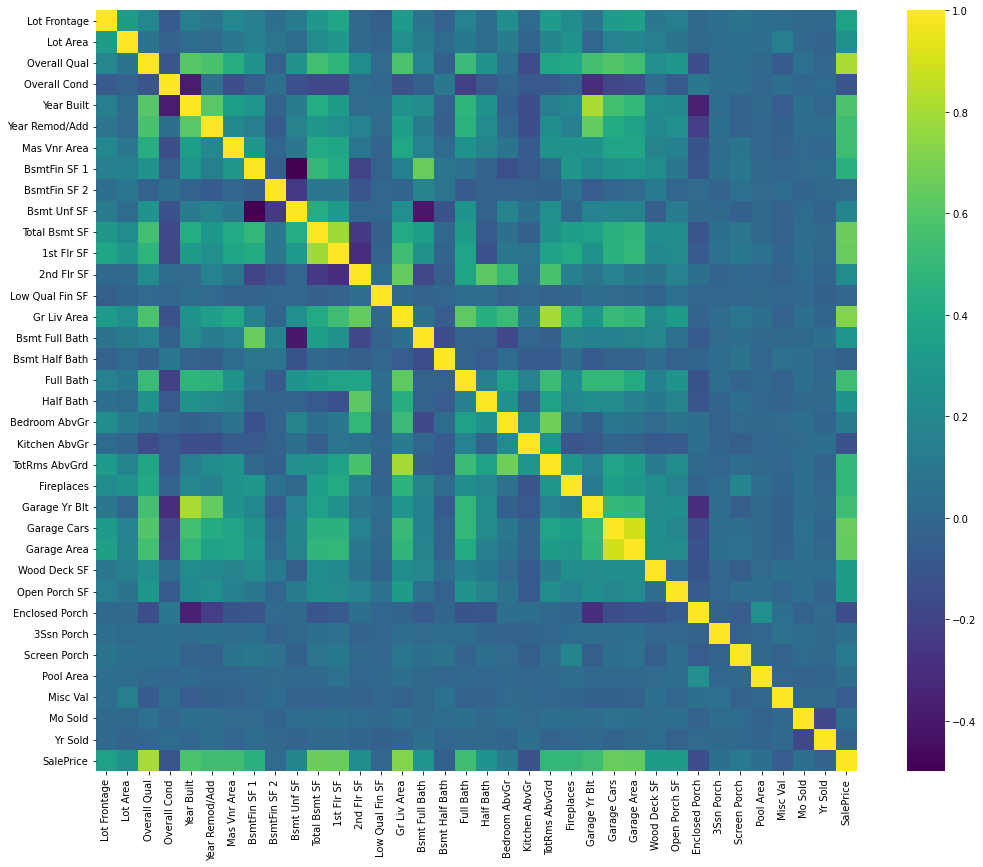

In [30]:
# Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(18, 14))
sns.heatmap(corrmat, vmin=-0.5, vmax=1, square=True, cmap="viridis")

In [32]:
# Correlation with output variable
cor = df.corr()
cor_target = abs(cor["SalePrice"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.55]
features_list = relevant_features.index

<AxesSubplot:>

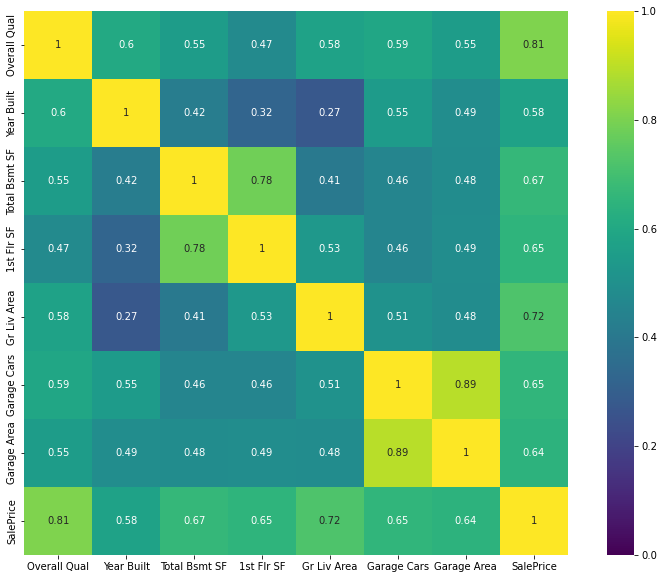

In [33]:
# Correlation map to see how features are correlated with SalePrice
corrmat = df[features_list].corr()
plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="viridis", annot=True)

Text(0.5, 1.0, 'Log Sale Price')

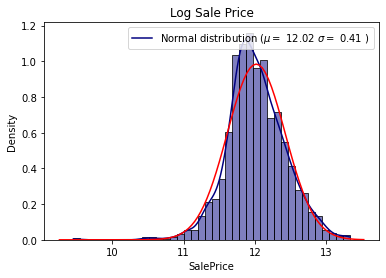

In [35]:
df["SalePrice"] = np.log(df["SalePrice"])

sns.set_color_codes()
ax = sns.histplot(df["SalePrice"], bins=40, stat="density", color="navy", kde=True)
mu, std = stats.norm.fit(df["SalePrice"])
normal_dist = np.linspace(*ax.get_xlim(), 100)
ax.plot(normal_dist, stats.norm.pdf(normal_dist, mu, std), color="red")
ax.legend(
    ["Normal distribution ($\mu=$ {:.2f} $\sigma=$ {:.2f} )".format(mu, std)],
    loc="best",
)
ax.set_title("Log Sale Price")

<AxesSubplot:>

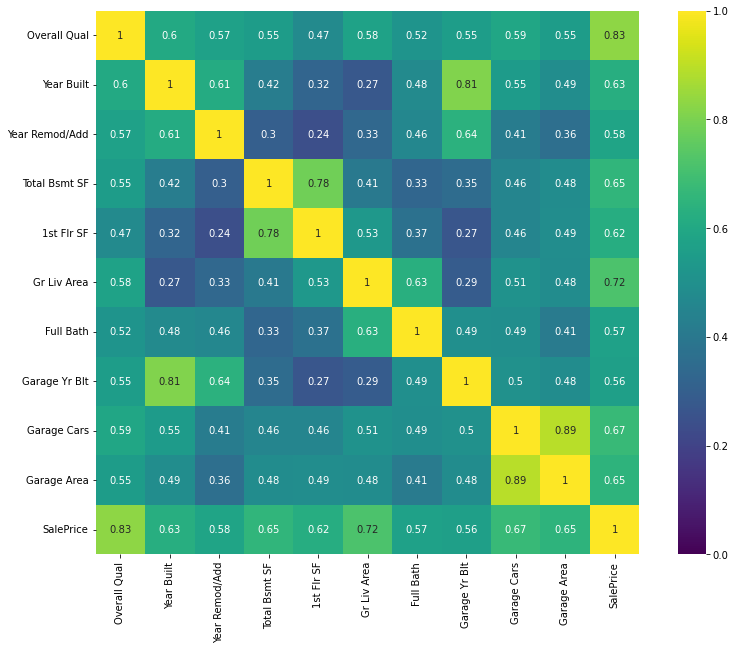

In [36]:
# Correlation with output variable
cor = df.corr()
cor_target = abs(cor["SalePrice"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.55]
features_list = relevant_features.index
# Correlation map to see how features are correlated with SalePrice
corrmat = df[features_list].corr()
plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="viridis", annot=True)

In [37]:
df["Has Mas Vnr"] = df["Mas Vnr Area"].apply(lambda x: 1 if x > 0 else 0)
df["Has Basement"] = df["Total Bsmt SF"].apply(lambda x: 1 if x > 0 else 0)
df["Has 2ndFloor"] = df["2nd Flr SF"].apply(lambda x: 1 if x > 0 else 0)
df["Has Garage"] = df["Garage Area"].apply(lambda x: 1 if x > 0 else 0)
df["Has WoodDeck"] = df["Wood Deck SF"].apply(lambda x: 1 if x > 0 else 0)
df["Has Porch"] = df["Open Porch SF"].apply(lambda x: 1 if x > 0 else 0)

In [38]:
df.drop("Total Bsmt SF", inplace=True, axis=1)

In [39]:
df.drop("Exter Qual", inplace=True, axis=1)

In [40]:
df.drop("Garage Yr Blt", inplace=True, axis=1)

In [41]:
df.drop("Garage Area", inplace=True, axis=1)

In [42]:
df["New"] = np.where(df["Yr Sold"] == df["Year Built"], 1, 0)

In [43]:
df["Bath"] = (
    df["Full Bath"]
    + (0.5 * df["Half Bath"])
    + df["Bsmt Full Bath"]
    + (0.5 * df["Bsmt Half Bath"])
)

df.drop("Full Bath", inplace=True, axis=1)
df.drop("Half Bath", inplace=True, axis=1)
df.drop("Bsmt Full Bath", inplace=True, axis=1)
df.drop("Bsmt Half Bath", inplace=True, axis=1)

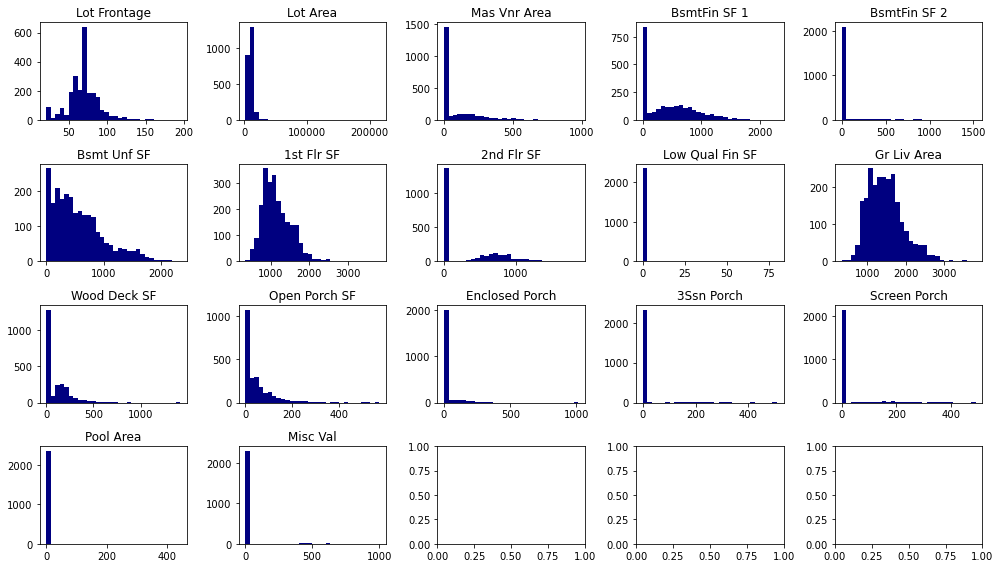

In [46]:
continuous = [
    "Lot Frontage",
    "Lot Area",
    "Mas Vnr Area",
    "BsmtFin SF 1",
    "BsmtFin SF 2",
    "Bsmt Unf SF",
    "1st Flr SF",
    "2nd Flr SF",
    "Low Qual Fin SF",
    "Gr Liv Area",
    "Wood Deck SF",
    "Open Porch SF",
    "Enclosed Porch",
    "3Ssn Porch",
    "Screen Porch",
    "Pool Area",
    "Misc Val",
]
# A quick look at the distribution of the variables
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(14, 8))

for c, ax in zip(continuous, axes.ravel()):
    ax.hist(df[c].dropna(), bins=30, color="navy")
    ax.set_title(c)

plt.tight_layout()  # to avoid overlapping with the labels
plt.show()

In [47]:
# Continuous features from the documentation

# Preprocessing function
def log_poly(features, frame):
    # Work on a copy
    frame = frame.copy()

    # One-hot encoding (directly done in the df)
    frame = pd.get_dummies(frame, dummy_na=True)
    # Apply log-transform
    frame[features] = np.log1p(frame[features])

    # Add polynomial features
    for f in features:
        for d in [0.5, 2, 3]:
            name = "{}**{}".format(f, d)
            frame[name] = frame[f] ** d
    return frame


log_poly = log_poly(continuous, df)
log_poly.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,3Ssn Porch**3,Screen Porch**0.5,Screen Porch**2,Screen Porch**3,Pool Area**0.5,Pool Area**2,Pool Area**3,Misc Val**0.5,Misc Val**2,Misc Val**3
0,4.248495,9.082052,7,5,2000,2000,0.000000,5.707110,0.0,6.481577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.330733,9.227296,6,6,1951,1951,6.259581,0.000000,0.0,5.379897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.091042,7.601902,4,5,1970,1970,4.394449,0.000000,0.0,6.304449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.262680,9.264165,5,5,1959,1959,0.000000,6.926577,0.0,5.942799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,9.222368,7,4,1910,1950,0.000000,0.000000,0.0,6.830874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)


f = pd.melt(df, id_vars=["SalePrice"], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

NameError: name 'qualitative' is not defined

In [49]:
def anova(frame):
    anv = pd.DataFrame()
    anv["feature"] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]["SalePrice"].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv["pval"] = pvals
    return anv.sort_values("pval")


a = anova(df)
g = sns.barplot(data=a, x="feature", y="pval")
g.set_yscale("log")
x = plt.xticks(rotation=90)

NameError: name 'qualitative' is not defined

In [53]:
# Create X, y
simple = ["Overall Qual", "Gr Liv Area"]
X_simple = log_poly[simple].values
medium = ["Overall Qual", "Year Built", "Year Remod/Add", "1st Flr SF", "Gr Liv Area"]
X_medium = log_poly[medium].values
X_complex = log_poly.drop("SalePrice", axis=1).values
y = log_poly.SalePrice.values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into train/test sets
X_tr_s, X_te_s, y_tr_s, y_te_s = train_test_split(
    X_simple, y, test_size=0.4, random_state=0
)
X_tr_m, X_te_m, y_tr_m, y_te_m = train_test_split(
    X_medium, y, test_size=0.4, random_state=0
)
X_tr_c, X_te_c, y_tr_c, y_te_c = train_test_split(
    X_complex, y, test_size=0.4, random_state=0
)
# Standardize features
scaler = StandardScaler()
X_tr_s_r = scaler.fit_transform(X_tr_s)
X_te_s_r = scaler.transform(X_te_s)
X_tr_m_r = scaler.fit_transform(X_tr_m)
X_te_m_r = scaler.transform(X_te_m)
X_tr_c_r = scaler.fit_transform(X_tr_c)
X_te_c_r = scaler.transform(X_te_c)

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

median_predictions = np.full_like(y_te_c, np.median(y_tr_c))
print("Median baseline: {:.2f}".format(MAE(y_te_c, median_predictions)))

Median baseline: 0.32


In [ ]:
#  Huber loss
from sklearn.linear_model import HuberRegressor

# Create the estimator
huber = HuberRegressor(epsilon=1.05, max_iter=10000)
# Fit it to X,y
huber.fit(X_tr_c_r, y_tr_c)
y_pred_huber_c = huber.predict(X_te_c_r)
mae_huber_c = MAE(y_te_c, y_pred_huber_c)
print(mae_huber_c)

# (C) Plot best model
%matplotlib inline
import matplotlib.pyplot as plt

# Plot models
overall_te_c = X_te_c_r[:, 5]  # 1: Overall Quality column
plt.scatter(overall_te_c, y_te_c, s=10, label="test points")
plt.scatter(overall_te_c, y_pred_huber_c, s=10, label="predictions (huber)")
plt.legend()
plt.show()